In [1]:
import pandas as pd
import numpy as np


In [17]:
#import necessary packages
from matplotlib import pyplot as plt
from numpy import mean
from numpy import std
from scipy.stats import sem
from scipy import stats
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [3]:
#Import the data --> this file represents only the train set
data = pd.read_csv("Train_set_CC.csv", encoding = "latin-1")
del data["Unnamed: 0"]
data.head()

,FV_D,FV_M,FV_DATE,VISIT_CODE,WP_ID,NAICS,RegCode,INDCode,HICCode,HICPerCode,E1524Code,E2554Code,E55pCode,ConCode,Claims_Code
0,29,6,2019-06-29,2019-06-29 2093649,2093649,812115,3,10,1,2,1,1,2,1,1
1,25,2,2019-02-25,2019-02-25 1095872,1095872,812330,2,10,2,2,1,1,2,4,1
2,19,6,2019-06-19,2019-06-19 2091294,2091294,812190,2,10,2,2,1,1,2,4,1
3,6,5,2019-05-06,2019-05-06 2029237,2029237,238990,4,4,5,5,2,2,2,1,3
4,25,10,2019-10-25,2019-10-25 2125435,2125435,236110,4,4,5,5,2,2,2,3,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19070 entries, 0 to 19069
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FV_D         19070 non-null  int64 
 1   FV_M         19070 non-null  int64 
 2   FV_DATE      19070 non-null  object
 3   VISIT_CODE   19070 non-null  object
 4   WP_ID        19070 non-null  int64 
 5   NAICS        19070 non-null  int64 
 6   RegCode      19070 non-null  int64 
 7   INDCode      19070 non-null  int64 
 8   HICCode      19070 non-null  int64 
 9   HICPerCode   19070 non-null  int64 
 10  E1524Code    19070 non-null  int64 
 11  E2554Code    19070 non-null  int64 
 12  E55pCode     19070 non-null  int64 
 13  ConCode      19070 non-null  int64 
 14  Claims_Code  19070 non-null  int64 
dtypes: int64(13), object(2)
memory usage: 2.2+ MB


In [5]:
data.isnull().sum()

FV_D           0
FV_M           0
FV_DATE        0
VISIT_CODE     0
WP_ID          0
NAICS          0
RegCode        0
INDCode        0
HICCode        0
HICPerCode     0
E1524Code      0
E2554Code      0
E55pCode       0
ConCode        0
Claims_Code    0
dtype: int64

Split data into 70:30 train / validation sets

In [22]:
#using the train set define the features (X) and target (y) --> using Claims_Code as dependent variable
#includes all features

X = data.drop(['FV_DATE', 'VISIT_CODE','Claims_Code'], axis=1)
y = data['Claims_Code']

print(list(X.columns.values))  #Features used in the model
print(X.shape, y.shape)
print(y.value_counts())

['FV_D', 'FV_M', 'WP_ID', 'NAICS', 'RegCode', 'INDCode', 'HICCode', 'HICPerCode', 'E1524Code', 'E2554Code', 'E55pCode', 'ConCode']
(19070, 12) (19070,)
4    4527
1    4089
2    4063
5    3377
3    3014
Name: Claims_Code, dtype: int64


In [57]:
#using the train set define the features (X) and target (y) --> using Claims_Code as dependent variable
#features identified during Feature Selection via RFE method -->  'NAICS','RegCode', 'HICCode', 'E1524Code','E2554Code'

X = data.drop(['FV_D', 'FV_M', 'FV_DATE', 'VISIT_CODE', 'WP_ID', 'INDCode', 'HICPerCode', 'E55pCode','ConCode', 'Claims_Code'], axis=1)
y = data['Claims_Code']

print(list(X.columns.values))  #Features used in the model
print(X.shape, y.shape)
print(y.value_counts())

['NAICS', 'RegCode', 'HICCode', 'E1524Code', 'E2554Code']
(19070, 5) (19070,)
4    4527
1    4089
2    4063
5    3377
3    3014
Name: Claims_Code, dtype: int64


In [45]:
#using the train set define the features (X) and target (y) --> using Claims_Code as dependent variable
#features identified during Feature Selection via chi^2 method -->  'WP_ID', 'NAICS','INDCode', 'HICCode', 'HICPerCode'
X = data.drop(['FV_D', 'FV_M', 'FV_DATE', 'VISIT_CODE', 'RegCode', 'E2554Code', 'E1524Code', 'E55pCode','ConCode', 'Claims_Code'], axis=1)
y = data['Claims_Code']

print(list(X.columns.values))  #Features used in the model
print(X.shape, y.shape)
print(y.value_counts())

['WP_ID', 'NAICS', 'INDCode', 'HICCode', 'HICPerCode']
(19070, 5) (19070,)
4    4527
1    4089
2    4063
5    3377
3    3014
Name: Claims_Code, dtype: int64


In [58]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y,  test_size = 0.30)

In [59]:
print(X_tr.shape, y_tr.shape,X_ts.shape,y_ts.shape)

(15256, 5) (15256,) (3814, 5) (3814,)


LOGISTIC REGRESSION MODEL

In [10]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [60]:
#configure the LogisticRegression function for multinomial logistic regression

LR_model = LogisticRegression(multi_class = 'multinomial')
LR_model.fit(X_tr, y_tr)
y_predicted = LR_model.predict(X_ts)

In [61]:
print(accuracy_score(y_ts, y_predicted))

0.2118510749868904


In [62]:
#Cross validation
LR_model = LogisticRegression(multi_class = 'multinomial')
cv = RepeatedKFold(n_splits=10, n_repeats=10)
LRmod_scores = cross_val_score(LR_model, X, y, scoring = 'accuracy', cv=cv, n_jobs=-1)

print(LRmod_scores)
print(mean(LRmod_scores), std(LRmod_scores))

[0.20660724 0.21447299 0.207656   0.21919245 0.21342423 0.22024122
 0.20555847 0.21709491 0.21971683 0.22024122 0.20503408 0.21447299
 0.21866807 0.21080231 0.2045097  0.23072889 0.21552176 0.21237546
 0.21080231 0.22128998 0.2207656  0.22548506 0.20975354 0.2207656
 0.21342423 0.20293655 0.20975354 0.21552176 0.20975354 0.21604615
 0.22758259 0.2013634  0.20870477 0.22600944 0.22024122 0.2045097
 0.21132669 0.23177766 0.19559518 0.21709491 0.21447299 0.21237546
 0.21447299 0.21814368 0.22600944 0.19664394 0.2239119  0.21971683
 0.21132669 0.20713162 0.22338752 0.21919245 0.20293655 0.21447299
 0.22600944 0.22024122 0.21080231 0.21237546 0.20083901 0.21394861
 0.21132669 0.21394861 0.21657053 0.19926586 0.22653382 0.21709491
 0.22338752 0.2176193  0.21289984 0.20555847 0.2013634  0.22233875
 0.21237546 0.21657053 0.21499738 0.21185107 0.20241217 0.22128998
 0.20608285 0.23492396 0.20608285 0.20922916 0.22024122 0.20975354
 0.2207656  0.21185107 0.19454641 0.23072889 0.21237546 0.228631

In [64]:
#Create confusion matrix

from sklearn.metrics import confusion_matrix
con_matx = confusion_matrix(y_ts, y_predicted)
print(con_matx)

[[808   0   0   0   0]
 [787   0   0   0   0]
 [606   0   0   0   0]
 [890   0   0   0   0]
 [723   0   0   0   0]]


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_ts, y_predicted))

              precision    recall  f1-score   support

           1       0.21      1.00      0.35       808
           2       0.00      0.00      0.00       787
           3       0.00      0.00      0.00       606
           4       0.00      0.00      0.00       890
           5       0.00      0.00      0.00       723

    accuracy                           0.21      3814
   macro avg       0.04      0.20      0.07      3814
weighted avg       0.04      0.21      0.07      3814



C:\Users\eddym\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eddym\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eddym\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
# create function to evaluate the Repeated k-fold model
def mod_eval(X, y, Reps):
    cv = RepeatedKFold(n_splits=10, n_repeats=Reps)
    model = LogisticRegression(multi_class = 'multinomial')
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 

# configurations to test
Reps = range(1,11)
results = list()
for r in Reps:
    scores = mod_eval(X, y, r)
    print('Run %d :mean=%.4f se=%.3f' % (r, mean(scores), stats.sem(scores)))
    results.append(scores)

Run 1 :mean=0.2144 se=0.004
Run 2 :mean=0.2144 se=0.003
Run 3 :mean=0.2144 se=0.001
Run 4 :mean=0.2144 se=0.002
Run 5 :mean=0.2144 se=0.001
Run 6 :mean=0.2144 se=0.001
Run 7 :mean=0.2144 se=0.001
Run 8 :mean=0.2144 se=0.001
Run 9 :mean=0.2144 se=0.001
Run 10 :mean=0.2144 se=0.001


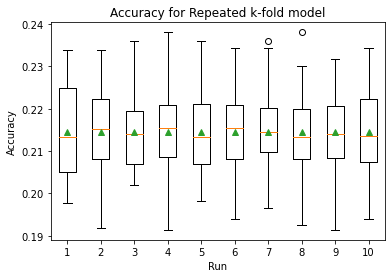

In [67]:
#plot the average accuracy for the Repeated k-fold model

plt.boxplot(results, labels=[str(r) for r in Reps], showmeans=True)
plt.title('Accuracy for Repeated k-fold model')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.show()


In [68]:
# create function to evaluate the Stratified repeated k-fold model
def mod_eval(X, y, Reps):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=Reps)
    model = LogisticRegression(multi_class = 'multinomial')
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 

# configurations to test
Reps = range(1,11)
results = list()
for r in Reps:
    scores = mod_eval(X, y, r)
    print('Run -> %d mean=%.4f se=%.3f' % (r, mean(scores), stats.sem(scores)))
    results.append(scores)

Run -> 1 mean=0.2144 se=0.000
Run -> 2 mean=0.2144 se=0.000
Run -> 3 mean=0.2144 se=0.000
Run -> 4 mean=0.2144 se=0.000
Run -> 5 mean=0.2144 se=0.000
Run -> 6 mean=0.2144 se=0.000
Run -> 7 mean=0.2144 se=0.000
Run -> 8 mean=0.2144 se=0.000
Run -> 9 mean=0.2144 se=0.000
Run -> 10 mean=0.2144 se=0.000


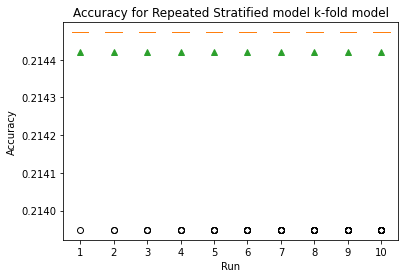

In [69]:
#plot the average accuracy stratified model

plt.boxplot(results, labels=[str(r) for r in Reps], showmeans=True)
plt.title('Accuracy for Repeated Stratified model k-fold model')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.show()
